## Install Sentinel-Hub

In [ ]:
pip install sentinelhub --upgrade

     |████████████████████████████████| 194kB 5.6MB/s 
     |████████████████████████████████| 133kB 15.6MB/s 
     |████████████████████████████████| 7.0MB 10.4MB/s 
     |████████████████████████████████| 6.5MB 44.8MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
     |████████████████████████████████| 71kB 8.1MB/s 
  Created wheel for sentinelhub: filename=sentinelhub-3.1.0-cp36-none-any.whl size=196404 sha256=9f087b2a437283d5326e8e45a1019e5a3ae9e0196e96b89f886722e959399bbe
  Stored in directory: /root/.cache/pip/wheels/90/6c/df/be1525ead52f5c2ce49f0880e73587723bf25caac7295f9db2
  Created wheel for utm: filename=utm-0.7.0-cp36-none-any.whl size=6095 sha256=10fcf31e26eef4c67d7a75b806813288b6f4420e8bcf4a6f3d537c1cf7bb4e93
  Stored in directory: /root/.cache/pip/wheels/d3/a0/c4/93c7535fe705e70d2376505fd2683f91524a50a944a15212d9
Successfully built sentinelhub utm
ERROR: botocore 1.19.30 has requirement urllib3<1.27,>=1.25.4; python_version != "3.4", but you'll have urllib3 1.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


### Put the path to the folder where we want to save the files from Sentinelhub

In [ ]:
rootPath="/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/LANDSAT8/"


### SENTINEL-HUB for python configuration.

In [ ]:
from sentinelhub import SHConfig


INSTANCE_ID = 'ec425561-c50f-4445-b18a-f99cfe3f6ce2'  # In case you put instance ID into configuration file you can leave this unchanged

if INSTANCE_ID:
    config = SHConfig()
    config.instance_id = INSTANCE_ID
else:
    config = None

#### Imports 

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

### Import the Libraries

In [ ]:
# Please, install all the neccesary libs.
import datetime
import numpy as np

import matplotlib.pyplot as plt
import os 
import json 

In [ ]:
from sentinelhub import WmsRequest, WcsRequest, MimeType, CRS, BBox, DataCollection

In [ ]:
def plot_image(image, factor=1):
    """
    Utility function for plotting RGB images.
    """
    fig = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))
    
    if np.issubdtype(image.dtype, np.floating):
        plt.imshow(np.minimum(image * factor, 1))
    else:
        plt.imshow(image)

### Definir el numero del campo de Talca: 
#### Comentar primero uno de los dos campos y ejecutar el código. Realizar lo mismo con el otro campo. 

In [ ]:
"""num_campo=1
talca_campo='campo1' """

num_campo=2
talca_campo='campo2' 

In [ ]:
if num_campo==1:
  talca_coords_wgs84 = [-71.817933, -35.452880, -71.807166, -35.446550] #TALCA coordinates 1st PART (Parte izquierda del terreno)
else:
  talca_coords_wgs84 = [-71.800228, -35.457577, -71.786453, -35.449821] #TALCA coordinates 2nd PART (Parte derecha del terreno)

#FORMAT(LONGITUDE1, LATITUDE1, LONGITUDE2, LATITUDE2) From Google Earth they are lower left and upper rigth corners 

In [ ]:
talca_bbox = BBox(bbox=talca_coords_wgs84, crs=CRS.WGS84)

Since data has been already downloaded the next request will read the data from disk instead of downloading it. That will be much faster.

In [ ]:
wms_bands_request_from_disk = WmsRequest(
    data_collection=DataCollection.LANDSAT8,
    data_folder=rootPath,
    layer='BANDS-L8',
    bbox=talca_bbox,
    time=('2017-12-01','2017-12-31'),
    width=600,
    image_format=MimeType.TIFF,
    time_difference=datetime.timedelta(hours=2),
    config=config
)

In [ ]:
#A list to save the image names and another one to the folders names
image_names=[]
folder_paths=[]
for folder, _, filenames in os.walk(wms_bands_request_from_disk.data_folder):
    for filename in filenames:
        if filename[-1] != 'n':
          if filename[:6]==talca_campo:
            image_names.append(filename)
            folder_paths.append(folder)
            print(os.path.join(folder, filename))
print(image_names)
print("-----------------")
print(folder_paths)
print("-----------------")
print(len(image_names))
print("-----------------")
print(len(folder_paths))

/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/LANDSAT8/campo2_Lansat8_2017-12-10/campo2_2017-12-10.tiff
/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/LANDSAT8/campo2_Lansat8_2017-12-03/campo2_2017-12-03.tiff
/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/LANDSAT8/campo2_Lansat8_2017-12-19/campo2_2017-12-19.tiff
['campo2_2017-12-10.tiff', 'campo2_2017-12-03.tiff', 'campo2_2017-12-19.tiff']
-----------------
['/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/LANDSAT8/campo2_Lansat8_2017-12-10', '/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/LANDSAT8/campo2_Lansat8_2017-12-03', '/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/LANDSAT8/campo2_Lansat8_2017-12-19']
-----------------
3
-----------------
3


In [ ]:
wms_bands_img_from_disk = wms_bands_request_from_disk.get_data()
print(type(wms_bands_img_from_disk))

<class 'list'>


(438, 600, 12)


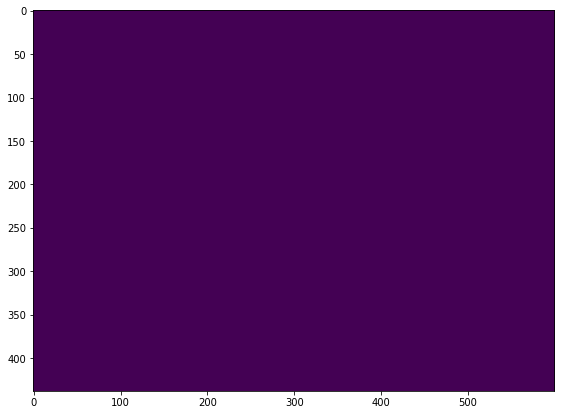

In [ ]:
plot_image(wms_bands_img_from_disk[0][:, :, 8])
print((wms_bands_img_from_disk[0].shape))

### Import OpenCV 

In [ ]:
import cv2
import subprocess
import tifffile as tiff
from google.colab.patches import cv2_imshow

### Get one image per channel and then save it

In [ ]:
#Define a list to save the paths to each channel image of every folder
channels_paths=[]
if talca_campo=='campo1':  
  for i in range(len(image_names)):
    for j in range(9):
      img=wms_bands_img_from_disk[i][:, :, j]
      #pathToEachFolder=''
      name="channel"+str(j+1)+"_"+image_names[i]
      path=folder_paths[i]+"/channels"
      mkdircommand=['mkdir', path]
      subprocess.run(mkdircommand).stdout
      channels_paths.append(path+"/"+name)
      cv2.imwrite(path+"/"+name, img )
      print(path+"/"+name)

else:  
  for i in range(len(image_names)):
    for j in range(9):
      img=wms_bands_img_from_disk[i][:, :, j]
      #pathToEachFolder=''
      name="channel"+str(j+1)+"_"+image_names[i]
      path=folder_paths[i]+"/channels"
      mkdircommand=['mkdir', path]
      subprocess.run(mkdircommand).stdout
      channels_paths.append(path+"/"+name)
      cv2.imwrite(path+"/"+name, img )
      print(path+"/"+name)
print(channels_paths)

/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/LANDSAT8/campo2_Lansat8_2017-12-10/channels/channel1_campo2_2017-12-10.tiff
/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/LANDSAT8/campo2_Lansat8_2017-12-10/channels/channel2_campo2_2017-12-10.tiff
/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/LANDSAT8/campo2_Lansat8_2017-12-10/channels/channel3_campo2_2017-12-10.tiff
/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/LANDSAT8/campo2_Lansat8_2017-12-10/channels/channel4_campo2_2017-12-10.tiff
/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/LANDSAT8/campo2_Lansat8_2017-12-10/channels/channel5_campo2_2017-12-10.tiff
/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/LANDSAT8/campo2_Lansat8_2017-12-10/channels/channel6_campo2_2017-12-10.tiff
/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/LANDSAT8/campo2_Lansat8_2017-12-10/channels/channel7_campo2_2017-12-10.tiff
/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/LANDSAT8/campo2_Lans

### Define the function to crop the image

In [ ]:
def crop_image(img, path,name, num_campo):
  #Tratar de cropear la imagen
  mask = np.zeros(img.shape[0:2], dtype=np.uint8)
  if num_campo == 1:
    points = np.array([[[191,39],[110,412],[221,402],[283,421],[311,315],[394,333],[443,117],[276,38]]]) #Talca first part
  else:
    points = np.array([[[118,22],[93,35],[79,52],[51,85],[233,304],[285,340],[452,380],[569,51]]])  #Talca second part
  #method 1 smooth region
  cv2.drawContours(mask, [points], -1, (255, 255, 255), -1, cv2.LINE_AA)
  #method 2 not so smooth region
  res = cv2.bitwise_and(img,img,mask = mask)
  rect = cv2.boundingRect(points) # returns (x,y,w,h) of the rect
  cropped = res[rect[1]: rect[1] + rect[3], rect[0]: rect[0] + rect[2]]
  ## crate the white background of the same size of original image
  wbg = np.ones_like(img, np.uint8)*255
  cv2.bitwise_not(wbg,wbg, mask=mask)
  # overlap the resulted cropped image on the white background
  definitive_path=path+"/crop_"+name
  cv2.imwrite(definitive_path, res)
  return definitive_path


In [ ]:
print(len(channels_paths))

27


In [ ]:
print(len(folder_paths))

3


### Crop the images per channel

In [ ]:
#Array to save the paths to the crop images
crop_folders=[]

#make the directories for crop images
for i in range(len(folder_paths)):
  #pathToEachFolder=''
  path=folder_paths[i]+"/crop_channels"
  mkdircommand=['mkdir', path]
  subprocess.run(mkdircommand).stdout
  crop_folders.append(path)
print(crop_folders)

['/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/LANDSAT8/campo2_Lansat8_2017-12-10/crop_channels', '/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/LANDSAT8/campo2_Lansat8_2017-12-03/crop_channels', '/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/LANDSAT8/campo2_Lansat8_2017-12-19/crop_channels']


In [ ]:
print((channels_paths[1][100:]))
print(type(channels_paths[-1:-33]))
#/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/e67a54e5351acd9bb4c014421fb67895/channels/channel2_campo2_2017-12-10.tiff

channel2_campo2_2017-12-10.tiff
<class 'list'>


In [ ]:
#Crop the images

#Array to save the path to each channel crop
channel_crops=[]
aux=-1
for i in range(len(channels_paths)):
  img=cv2.imread(channels_paths[i],cv2.IMREAD_UNCHANGED)
  print(img)
  if i%9!=0:
    crop_folder=crop_folders[aux]
  else:
    aux+=1
    crop_folder=crop_folders[aux]
  #Call to the function crop_image
  name=channels_paths[i][100:]
  channel_crops.append(crop_image(img,crop_folder,str(name), num_campo))

print(channel_crops)

[[0.1257 0.1257 0.1257 ... 0.1455 0.1455 0.1501]
 [0.1226 0.1226 0.1257 ... 0.1455 0.1455 0.1501]
 [0.1226 0.1226 0.1226 ... 0.1455 0.1455 0.1501]
 ...
 [0.1411 0.1411 0.1411 ... 0.129  0.129  0.129 ]
 [0.1411 0.1411 0.1411 ... 0.129  0.129  0.129 ]
 [0.1411 0.1411 0.1411 ... 0.129  0.129  0.129 ]]
[[0.1058 0.1058 0.1058 ... 0.1261 0.1261 0.1346]
 [0.0986 0.0986 0.1058 ... 0.1261 0.1261 0.1346]
 [0.0986 0.0986 0.0986 ... 0.1261 0.1261 0.1346]
 ...
 [0.1279 0.1279 0.1279 ... 0.1099 0.1099 0.1099]
 [0.1279 0.1279 0.1279 ... 0.1099 0.1099 0.1099]
 [0.1279 0.1279 0.1279 ... 0.1099 0.1099 0.1099]]
[[0.0956 0.0956 0.0956 ... 0.1232 0.1232 0.1336]
 [0.0851 0.0851 0.0956 ... 0.1232 0.1232 0.1336]
 [0.0851 0.0851 0.0851 ... 0.1232 0.1232 0.1336]
 ...
 [0.1143 0.1143 0.1143 ... 0.1006 0.1006 0.1006]
 [0.1143 0.1143 0.1143 ... 0.1006 0.1006 0.1006]
 [0.1143 0.1143 0.1143 ... 0.1006 0.1006 0.1006]]
[[0.0781 0.0781 0.0781 ... 0.1362 0.1362 0.143 ]
 [0.0612 0.0612 0.0781 ... 0.1362 0.1362 0.143 ]
 [

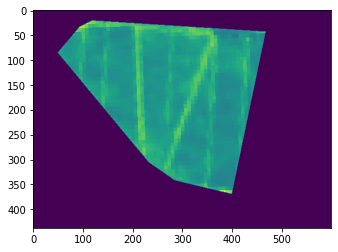

In [ ]:
img_read= tiff.imread(channel_crops[25])
plt.imshow(img_read)

In [ ]:
#Prueba de leer la imagen

#imagen = tiff.imread('/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/e67a54e5351acd9bb4c014421fb67895/channels/channel1_campo2_2017-12-10.tiff')
#img=wms_bands_img_from_disk[2][:, :, 2]
#plt.imshow(imagen)